<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/chest%20xray%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# https://www.kaggle.com/preetviradiya/covid19-radiography-dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data_dir = "C:\\Users\\anu\\Desktop\\Udemy\\lung_images\\COVID-19_Radiography_Dataset\\"
os.listdir(data_dir)

['test', 'train']

In [3]:
train_path = data_dir + "train\\"
test_path = data_dir + "test\\"

In [4]:
first_image = os.listdir(train_path+"COVID")[0]

In [5]:
first_image_to_nparray = imread(train_path+"COVID\\"+first_image)
first_image_to_nparray.shape

(299, 299)

In [6]:
first_image_to_nparray = first_image_to_nparray.reshape(299,299,1)

In [7]:
first_image_to_nparray.shape

(299, 299, 1)

In [8]:
first_image_to_nparray.max()

0.9882353

In [9]:
first_image_to_nparray.min()

0.0

In [10]:
def check_dimensions(path):
  dim1 = []
  dim2 = []
  for image in os.listdir(path):
    img = imread(path+"\\"+image)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
  return dim1, dim2

In [13]:
# Checking dimension of COVID pictures
covid_width, covid_height = check_dimensions(train_path + "COVID")
normal_width, normal_height = check_dimensions(train_path + "Normal")
viral_width, viral_height = check_dimensions(train_path + "Viral Pneumonia")

covid_width = np.mean(covid_width)
covid_height = np.mean(covid_height)

normal_width = np.mean(normal_width)
normal_height = np.mean(normal_height)

viral_width = np.mean(viral_width)
viral_height = np.mean(viral_height)


ValueError: ignored

In [ ]:
# covid_width
# covid_height
# normal_width
# normal_height
# viral_width
# viral_height

In [14]:
# All having same width and height

image_shape = (299, 299, 1)

In [15]:
# Use ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               zoom_range=0.1)

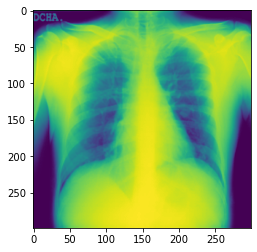

In [16]:
# Test a transformation of image
plt.imshow(first_image_to_nparray)

In [17]:
# Edited version
first_image_distorted = image_gen.random_transform(first_image_to_nparray)

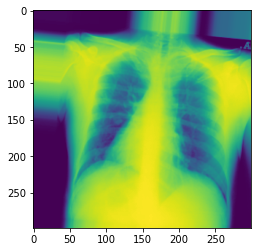

In [18]:
plt.imshow(first_image_distorted)

In [30]:
# Now Create a model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)           

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=5) # This is setting up early stopping

In [33]:
batch_size = 16
target_size = image_shape[:2]
epochs = 20

In [34]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=target_size,
                                                class_mode='categorical',
                                                batch_size=batch_size,
                                                shuffle=True,
                                                color_mode='grayscale')

Found 12123 images belonging to 3 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=target_size,
                                                class_mode='categorical',
                                                batch_size=batch_size,
                                                shuffle=False,
                                                color_mode='grayscale')

Found 3030 images belonging to 3 classes.


In [36]:
train_image_gen.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [37]:
results = model.fit(train_image_gen,
                              epochs=epochs,
                              validation_data=(test_image_gen),
                              callbacks=[early_stop])

Epoch 1/20
758/758 [==============================] - 791s 1s/step - loss: 2.3654 - accuracy: 0.7201 - val_loss: 1.0242 - val_accuracy: 0.5535
Epoch 2/20
758/758 [==============================] - 820s 1s/step - loss: 0.5612 - accuracy: 0.7494 - val_loss: 1.0875 - val_accuracy: 0.5835
Epoch 3/20
758/758 [==============================] - 790s 1s/step - loss: 0.5166 - accuracy: 0.7618 - val_loss: 1.0887 - val_accuracy: 0.5908
Epoch 4/20
758/758 [==============================] - 807s 1s/step - loss: 0.5213 - accuracy: 0.7641 - val_loss: 1.8817 - val_accuracy: 0.5119
Epoch 5/20
758/758 [==============================] - 787s 1s/step - loss: 0.4907 - accuracy: 0.7789 - val_loss: 1.2499 - val_accuracy: 0.5485
Epoch 6/20
758/758 [==============================] - 727s 959ms/step - loss: 0.4686 - accuracy: 0.7922 - val_loss: 1.4408 - val_accuracy: 0.5594


In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics.describe

<bound method NDFrame.describe of        loss  accuracy  val_loss  val_accuracy
0  2.365399  0.720119  1.024219      0.553465
1  0.561237  0.749402  1.087468      0.583498
2  0.516554  0.761775  1.088679      0.590759
3  0.521299  0.764085  1.881733      0.511881
4  0.490677  0.778850  1.249921      0.548515
5  0.468627  0.792213  1.440784      0.559406>

<AxesSubplot:>

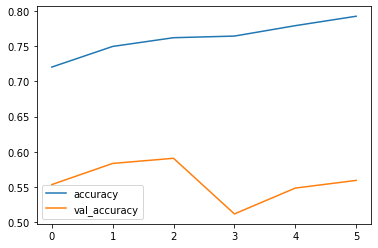

In [40]:
metrics[['accuracy', 'val_accuracy']].plot()

In [157]:
first_image_name = os.listdir(test_path+"COVID")[90]
test_image_to_nparray = imread(test_path+"COVID\\"+first_image_name)
test_image_to_nparray.shape

(299, 299)

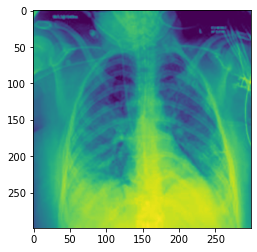

In [158]:
plt.imshow(test_image_to_nparray)

In [159]:
test_image_to_nparray = test_image_to_nparray.reshape(1,299,299,1)

In [160]:
output = model.predict(test_image_to_nparray)
output

array([[3.9614844e-01, 6.0385150e-01, 9.3609628e-08]], dtype=float32)

In [161]:
output.argmax()

1

In [77]:
predictions = model.predict(test_image_gen)

In [78]:
predictions[0]

array([4.7632048e-01, 5.2327091e-01, 4.0862724e-04], dtype=float32)